# New Taipei City House Price Prediction

The problem that we are going to solve here is that given a set of features that describe a house in New Taipei City-Sindhan Dist- Taiwan , our machine learning model must predict the house price. To train our machine learning model with New Taipei City housing data, we will be using scikit-learn’s New Taipei City real estate evaluation dataset.

In this dataset, each row describes a New Taipei City. There are 414 rows and 7 attributes (features) with a target column (house price of unit area)
https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [38]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import scipy.stats as stats

In [39]:
# Importing the Boston Housing dataset
New_Taipei_City = pd.read_csv(r'D:\CMadhuri\Real estate project\Real estate raw data.csv')

In [40]:
# Initializing the dataframe
data = pd.DataFrame(New_Taipei_City)
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
# See head of the dataset and dropping the 'No' column
data=data.drop(['No'], axis = 1)
data.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The factors affecting the selling price of a house are following:
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
X2=the house age (unit: year)
X3=the distance to the nearest MRT station (unit: meter)
X4=the number of convenience stores in the living circle on foot (integer)
X5=the geographic coordinate, latitude. (unit: degree)
X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)


In [42]:
#Check the shape of dataframe
data.dtypes
data.shape
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


array([[<AxesSubplot:xlabel='X1 transaction date', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X2 house age', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X4 number of convenience stores', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X5 latitude', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='X6 longitude', ylabel='X1 transaction date'>,
        <AxesSubplot:xlabel='Y house price of unit area', ylabel='X1 transaction date'>],
       [<AxesSubplot:xlabel='X1 transaction date', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X2 house age', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X4 number of convenience stores', ylabel='X2 house age'>,
        <AxesSubplot:xlabel='X5 latitude', ylabel='X2 house age'>,
        <AxesSubpl

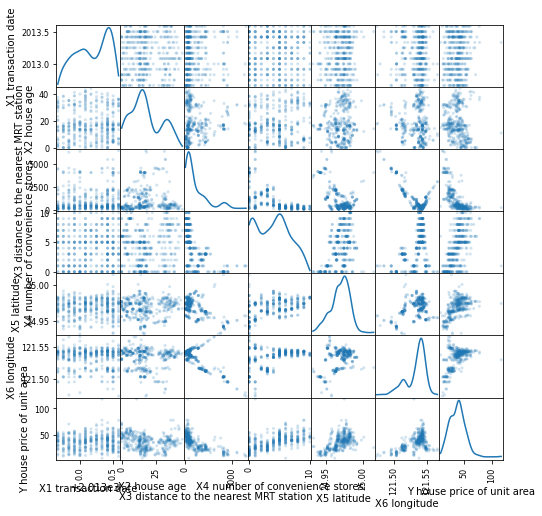

In [43]:
#Adding the feature names to the dataframe
scatter_matrix(data, alpha=0.2, figsize=(8, 8), diagonal='kde')

In [44]:
correlation_features=data.corr()   #Obtaining the correlation between the features
correlation_features

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [45]:
data.isna().sum()  # finding the null values in the dataset

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
data['X1 transaction date'] = LabelEncoder().fit_transform(data['X1 transaction date'])  # converting the categorical data to the numerical data
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,3,32.0,84.87882,10,24.98298,121.54024,37.9
1,3,19.5,306.59470,9,24.98034,121.53951,42.2
2,11,13.3,561.98450,5,24.98746,121.54391,47.3
3,10,13.3,561.98450,5,24.98746,121.54391,54.8
4,2,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,4,13.7,4082.01500,0,24.94155,121.50381,15.4
410,0,5.6,90.45606,9,24.97433,121.54310,50.0
411,7,18.8,390.96960,7,24.97923,121.53986,40.6
412,4,8.1,104.81010,5,24.96674,121.54067,52.5


In [47]:
#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler   
#data[['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area	']] = StandardScaler().fit_transform(data[['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']])
# standardizing the fetaure values
#data

In [48]:
#resp = data['Y house price of unit area']
#from scipy.stats import shapiro
#shapiro(resp)[1]

#num_feats = data.dtypes[data.dtypes!='objects'].index
#skew_feats = data[num_feats].skew().sort_values(ascending= False)
#skewness= pd.DataFrame({'Skew':skew_feats})
#skewness

## log Transformation of few varaiables

In [49]:
data['X3 distance to the nearest MRT station'] = np.log(data['X3 distance to the nearest MRT station'])
data['X5 latitude'] = np.log(data['X5 latitude'])
data['X6 longitude'] = np.log(data['X6 longitude'])
#data['X1 transaction date'] = np.log(data['X1 transaction date'])
data['Y house price of unit area'] = np.log(data['Y house price of unit area'])

data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,3,32.0,4.441225,10,3.218195,4.800245,3.634951
1,3,19.5,5.725527,9,3.218089,4.800239,3.742420
2,11,13.3,6.331474,5,3.218374,4.800276,3.856510
3,10,13.3,6.331474,5,3.218374,4.800276,4.003690
4,2,5.0,5.967603,5,3.218050,4.800264,3.763523
...,...,...,...,...,...,...,...
409,4,13.7,8.314346,0,3.216535,4.799946,2.734368
410,0,5.6,4.504864,9,3.217848,4.800269,3.912023
411,7,18.8,5.968630,7,3.218045,4.800242,3.703768
412,4,8.1,4.652150,5,3.217545,4.800249,3.960813


In [50]:
# Spliting target variable and independent variables
X = data.drop(['Y house price of unit area'], axis = 1)
y = data['Y house price of unit area']

In [51]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear Regression

## Train the model

In [52]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
# Value of y intercept
lm.intercept_

-2299.3152774604764

In [54]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,X1 transaction date,0.0142354
1,X2 house age,-0.0066316
2,X3 distance to the nearest MRT station,-0.167365
3,X4 number of convenience stores,0.00625885
4,X5 latitude,263.639
5,X6 longitude,303.251


### Model Evaluation


In [55]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [56]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7128842319515836
Adjusted R^2: 0.7067753858228938
MAE: 0.14019717826892927
MSE: 0.043568100980139954
RMSE: 0.20872973190262079


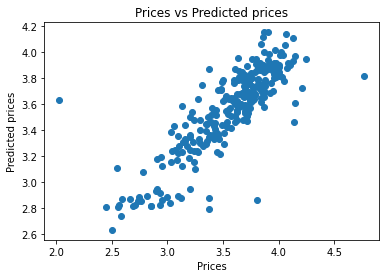

In [57]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

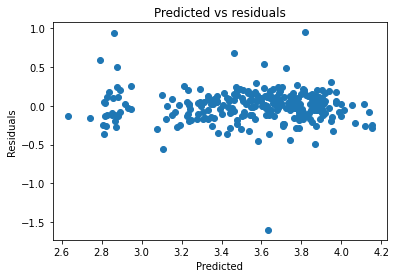

In [58]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


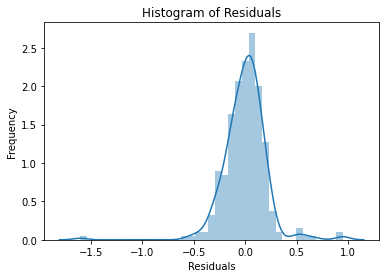

In [59]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Test data

In [60]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [61]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7409108844880129
Adjusted R^2: 0.7277368616653694
MAE: 0.15113722455242878
MSE: 0.04091520444697025
RMSE: 0.20227507124450667


## Inverse Log transformation

In [62]:
y_test_pred = np.expm1(y_test_pred)
y_test_pred.min()
y_test_pred.max()


61.65514664663465

# Random Forest Regressor 

#### Train the model

In [63]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [64]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [65]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9643145508214289
Adjusted R^2: 0.9635552859452892
MAE: 0.04941845561174908
MSE: 0.005415053530154633
RMSE: 0.07358704729879188


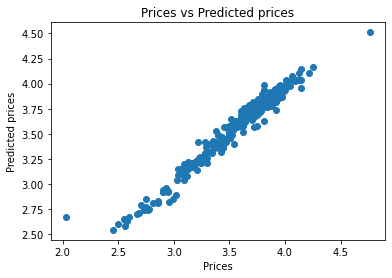

In [66]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

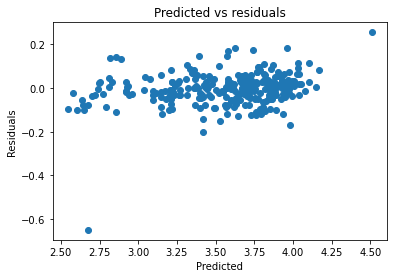

In [67]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [68]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [79]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8114258771411875
Adjusted R^2: 0.801837362419553
MAE: 0.12878439841664532
MSE: 0.02977951727122797
RMSE: 0.17256742818744206


# SVM Regressor

In [80]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model

In [81]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [82]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

#### Model Evaluation

In [83]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [84]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8137415667692944
Adjusted R^2: 0.8097786213814071
MAE: 0.11076273582446858
MSE: 0.028263603502367077
RMSE: 0.1681178262480427


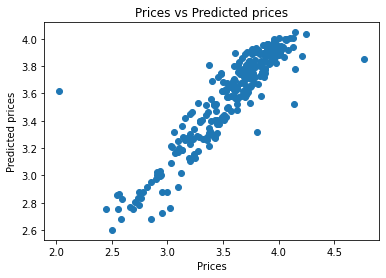

In [85]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

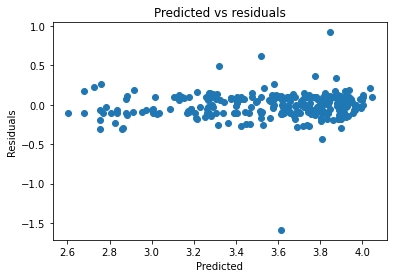

In [86]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### For test data

In [87]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [88]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8114258771411873
Adjusted R^2: 0.8018373624195527
MAE: 0.12878439841664535
MSE: 0.029779517271227997
RMSE: 0.17256742818744214


# Evaluation and comparision of all the models

In [89]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,81.142588
2,Support Vector Machines,81.142588
0,Linear Regression,74.091088
